Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [ ]:
# joining_data.ipynb notebook 3 - Questions in steps.

import json
import requests
import pandas as pd
import os

## Question-1: Join the data from Part 1 with the data from Part 2 to create a new dataframe.

## Drop duplicate columns from fsq data
fsq_columns_to_drop = ["latitude", "longitude", "Num_Bikes", "Empty_slots"]
df_all_fsq_pois_v2 = df_all_fsq_pois.drop(columns=fsq_columns_to_drop)

## Drop duplicate columns from yelp data
yelp_columns_to_drop = ["latitude", "longitude", "Num_Bikes", "Empty_slots"]
df_all_yelp_pois_v2 = df_all_yelp_pois.drop(columns=yelp_columns_to_drop)

## Merge the citybike, fsq and yelp data
merged_df_citybik_fsq = pd.merge(df_stations, df_all_fsq_pois_v2, on='Station Name', how='inner')
merged_df_citybik_fsq_yelp = pd.merge(merged_df_citybik_fsq, df_all_yelp_pois_v2, on='Station Name', how='inner')

print('\nTHIS IS CITYBIK, FOURSQUARE AND YELP DATA COMBINED')                  
print(merged_df_citybik_fsq_yelp)

## Convert dataframe to csv for better understanding of data.
merged_df_citybik_fsq_yelp.to_csv('mergeddata.csv', index=False)

Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

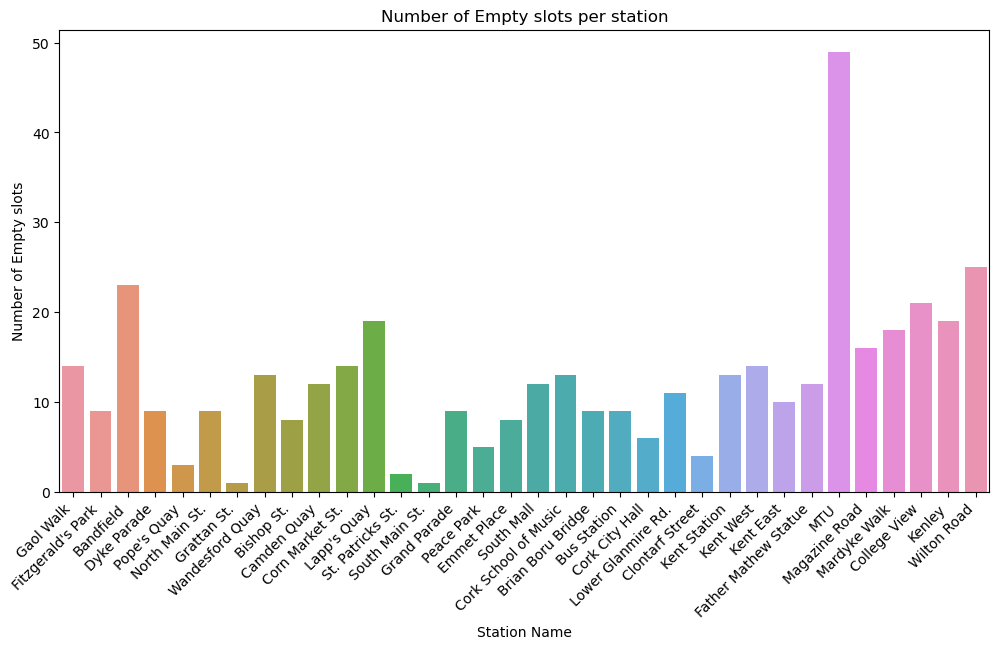

In [12]:
# Question-2: Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization.

import matplotlib.pyplot as plt
import seaborn as sns

## Convert "NA" values to NaN in the "Num_Bikes" column
merged_df_citybik_fsq_yelp["Empty_slots"] = pd.to_numeric(merged_df_citybik_fsq_yelp["Empty_slots"], errors="coerce")

## Filter out rows with non-numeric values in the "Num_Bikes" column
merged_df_citybik_fsq_yelp = merged_df_citybik_fsq_yelp.dropna(subset=["Empty_slots"])

## Bar Chart: Number of Bikes per Station
plt.figure(figsize=(12, 6))
sns.barplot(x="Station Name", y="Empty_slots", data=merged_df_citybik_fsq_yelp)
plt.title("Number of Empty slots per station")
plt.xlabel("Station Name")
plt.ylabel("Number of Empty slots")
plt.xticks(rotation=45, ha="right")
plt.show()

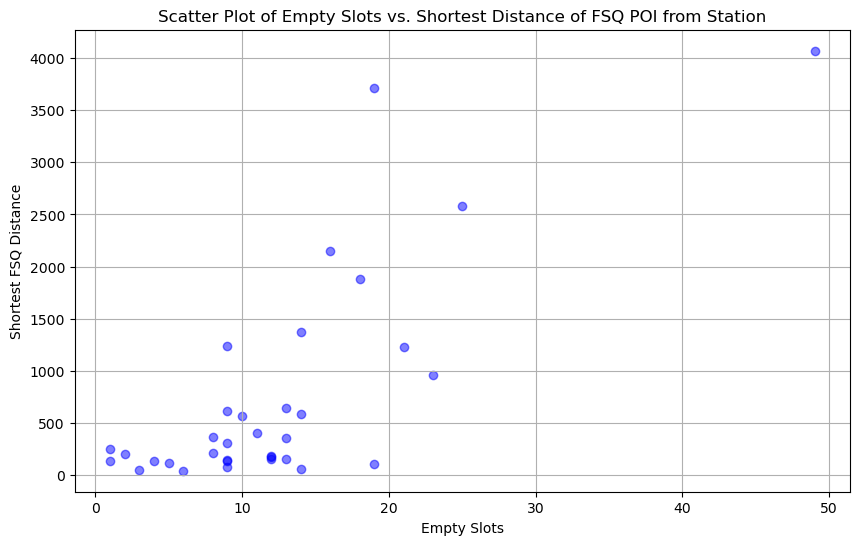

In [64]:
## Create a Scatter Plot of Empty Slots vs. Shortest FSQ Distance
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.scatter(
    merged_df_citybik_fsq_yelp["Empty_slots"],
    merged_df_citybik_fsq_yelp["Shortest FSQ Distance from Station"],
    alpha=0.5,  # Adjust the alpha for transparency
    color='b',  # Adjust the color
)

## Set axis labels and a title
plt.xlabel("Empty Slots")
plt.ylabel("Shortest FSQ Distance")
plt.title("Scatter Plot of Empty Slots vs. Shortest Distance of FSQ POI from Station")

## Show the plot
plt.grid(True)
plt.show()

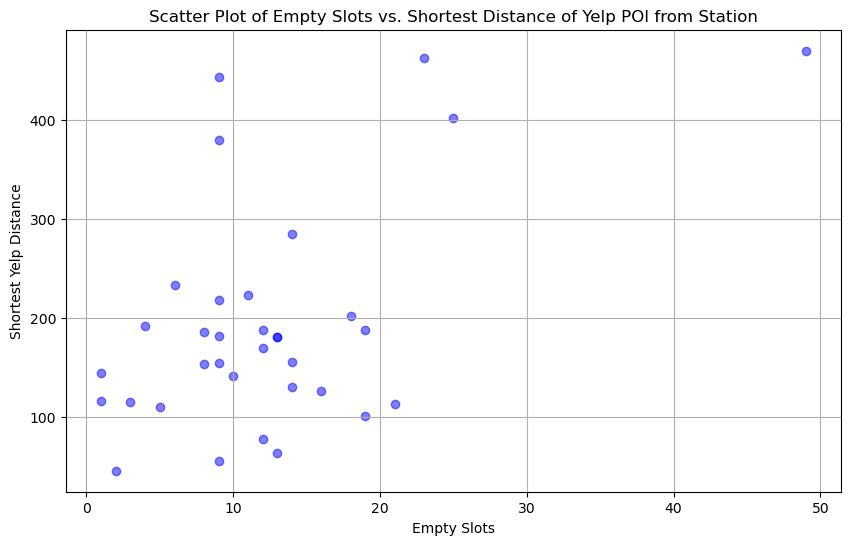

In [66]:
## Create a Scatter Plot of Empty Slots vs. Shortest Yelp Distance
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.scatter(
    merged_df_citybik_fsq_yelp["Empty_slots"],
    merged_df_citybik_fsq_yelp["Shortest Yelp Distance from Station"],
    alpha=0.5,  # Adjust the alpha for transparency
    color='b',  # Adjust the color
)

## Set axis labels and a title
plt.xlabel("Empty Slots")
plt.ylabel("Shortest Yelp Distance")
plt.title("Scatter Plot of Empty Slots vs. Shortest Distance of Yelp POI from Station")

## Show the plot
plt.grid(True)
plt.show()

Interpretation: Scatter plots were plotted to probe if any pattern or corelation exists between the number of empty slots at a particular station (which shows how busy it is) and how close any POI (shortest distance) to this station is. Scatter plot for both Yelp and FSQ were plotted. It is evident from scatter plots that there is some positive corelation between these variables but it is not strong. 

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [ ]:
# Question-3: Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

import sqlite3

## Function to convert lists to JSON-encoded strings
def list_to_json(lst):
    return json.dumps(lst)

## Create a connection to the SQLite database
conn = sqlite3.connect('db_df_citybik_fsq_yelp.db')

## Modify the DataFrames to store lists as JSON-encoded strings
df_all_fsq_pois['Foursquare POIS data'] = df_all_fsq_pois['Foursquare POIS data'].apply(list_to_json)
df_all_yelp_pois['Yelp POIS data'] = df_all_yelp_pois['Yelp POIS data'].apply(list_to_json)
merged_df_citybik_fsq_yelp['Foursquare POIS data'] = merged_df_citybik_fsq_yelp['Foursquare POIS data'].apply(list_to_json)
merged_df_citybik_fsq_yelp['Yelp POIS data'] = merged_df_citybik_fsq_yelp['Yelp POIS data'].apply(list_to_json)

## Convert citybike+fsq DataFrame to SQLite without specifying data types
df_all_fsq_pois.to_sql('table_df_citybik_fsq', conn, if_exists='replace', index=False)

## Convert citybike+yelp DataFrame to SQLite without specifying data types
df_all_yelp_pois.to_sql('table_df_citybik_yelp', conn, if_exists='replace', index=False)

## Convert Merged DataFrame to SQLite without specifying data types
merged_df_citybik_fsq_yelp.to_sql('table_merged_df_citybik_fsq_yelp', conn, if_exists='replace', index=False)

## Verify fsq table by reading from the database
query = "SELECT * FROM table_df_citybik_fsq LIMIT 5"
fsq_result = pd.read_sql_query(query, conn)
                           
## Verify by reading from the database
query = "SELECT * FROM table_df_citybik_yelp LIMIT 5"
yelp_result = pd.read_sql_query(query, conn)

## Verify by reading from the database
query = "SELECT * FROM table_merged_df_citybik_fsq_yelp LIMIT 5"
merged_result = pd.read_sql_query(query, conn)

## Close the database connection
conn.close()

Look at the data before and after the join to validate your data.

In [ ]:
# Question-4: Look at the data before and after the join to validate your data.
## Print the table to verify
print(fsq_result)
print(yelp_result)
print(merged_result)

## Close the database connection
conn.close()